<a href="https://colab.research.google.com/github/DwiBagiaSantosa/AI-Paintings-vs-Human-Paintings/blob/master/notebooks/DataCollection%26PrepScenarioTA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library yang dibutuhkan

In [ ]:
!pip install kaggle -q
!pip install split-folders -q
!pip install python-resize-image -q

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
from resizeimage import resizeimage
import splitfolders
import random
import cv2
import numpy as np

# Menyambungkan dengan Kaggle API

Download Token Kaggle

In [ ]:
!gdown 12dbe-Qb2d_FMQKQKqNI6qUARhMkD1XQP

Downloading...
From: https://drive.google.com/uc?id=12dbe-Qb2d_FMQKQKqNI6qUARhMkD1XQP
To: /content/kaggle.json
100% 71.0/71.0 [00:00<00:00, 320kB/s]


In [ ]:
# Kaggle API Set Up

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download Dataset yang dibutuhkan

In [ ]:
!gdown 1lbPH32hZuJ53C8zM5bvJ1tfM-AT2zJoq

Downloading...
From: https://drive.google.com/uc?id=1lbPH32hZuJ53C8zM5bvJ1tfM-AT2zJoq
To: /content/Portrait_AI_Generated.zip
100% 13.7M/13.7M [00:00<00:00, 23.9MB/s]


In [ ]:
!gdown 1nQcl_ubki1FEogtWFzcCyzCal7vUfCYG

Downloading...
From: https://drive.google.com/uc?id=1nQcl_ubki1FEogtWFzcCyzCal7vUfCYG
To: /content/Portrait_Human_Made.zip
100% 6.62M/6.62M [00:00<00:00, 49.4MB/s]


In [ ]:
!kaggle datasets download -d residentmario/segmented-bob-ross-images

Dataset URL: https://www.kaggle.com/datasets/residentmario/segmented-bob-ross-images
License(s): copyright-authors
 96% 49.0M/51.1M [00:00<00:00, 65.7MB/s]
100% 51.1M/51.1M [00:00<00:00, 61.1MB/s]


In [ ]:
!gdown 10sIoRHzBzsQKYCc2FkcshxmzDjKUFmrL

Downloading...
From (original): https://drive.google.com/uc?id=10sIoRHzBzsQKYCc2FkcshxmzDjKUFmrL
From (redirected): https://drive.google.com/uc?id=10sIoRHzBzsQKYCc2FkcshxmzDjKUFmrL&confirm=t&uuid=0e3ce54a-ea67-4fdf-b545-8d0a5ecf0ccf
To: /content/Generated_Dataset.zip
100% 121M/121M [00:06<00:00, 19.6MB/s]


# Menyiapkan Dataset (Split Dataset menjadi 3 sub folder yaitu train, test, val)

## Buat temporary folder

In [ ]:
!mkdir dirty_data

In [ ]:
import shutil

# Path to the directory you want to delete
folder_path = '/content/dirty_data'

# Delete the directory
shutil.rmtree(folder_path)

## Ekstrak dataset ke temporary folder

In [ ]:
!unzip -j -q Portrait_AI_Generated.zip "Portrait_AI_Generated/*" -d "dirty_data/Portrait_AI_Generated"
!unzip -j -q Portrait_Human_Made.zip "Portrait_Human_Made/*" -d "dirty_data/Portrait_Human_Made"
!unzip -j -q Generated_Dataset.zip "Dataset/*" -d "dirty_data/Landscape_AI_Generated"
!unzip -j -q segmented-bob-ross-images.zip "train/images/*" -d "dirty_data/Landscape_Human_Made"

## Fungsi untuk menghitung jumlah file dalam folder

In [ ]:
import os

def hitung_jumlah_file(path, ):
  files = os.listdir(path)

  jumlah_file = len(files)

  hasil = print(f"Jumlah file dalam path {path} adalah : ", jumlah_file)

  return hasil

In [ ]:
!ls -d dirty_data/Portrait_Human_Made/* | tail -n +251 | xargs rm

## Jumlah Keseluruhan Dataset Sebelum dilakukan Splitting dan Cleaning

In [ ]:
path1 = "dirty_data/Portrait_AI_Generated"
path2 = "dirty_data/Portrait_Human_Made"
path3 = "dirty_data/Landscape_AI_Generated"
path4 = "dirty_data/Landscape_Human_Made"

hitung_jumlah_file(path1)
hitung_jumlah_file(path2)
hitung_jumlah_file(path3)
hitung_jumlah_file(path4)

Jumlah file dalam path dirty_data/Portrait_AI_Generated adalah :  250
Jumlah file dalam path dirty_data/Portrait_Human_Made adalah :  250
Jumlah file dalam path dirty_data/Landscape_AI_Generated adalah :  250
Jumlah file dalam path dirty_data/Landscape_Human_Made adalah :  250


## Split Dataset sesuai kebutuhan

In [ ]:
splitfolders.fixed("dirty_data", output="dataset", seed=42, fixed=(25, 25))

Copying files: 1000 files [00:00, 1948.18 files/s]


## Jumlah Dataset untuk masing-masing sub folder setelah dilakukan splitting

### Jumlah Dataset `test` untuk AI Generated dan Human Made

In [ ]:
path1 = "dataset/test/Portrait_AI_Generated"
path2 = "dataset/test/Portrait_Human_Made"
path3 = "dataset/test/Landscape_AI_Generated"
path4 = "dataset/test/Landscape_Human_Made"

hitung_jumlah_file(path1)
hitung_jumlah_file(path2)
hitung_jumlah_file(path3)
hitung_jumlah_file(path4)

Jumlah file dalam path dataset/test/Portrait_AI_Generated adalah :  25
Jumlah file dalam path dataset/test/Portrait_Human_Made adalah :  25
Jumlah file dalam path dataset/test/Landscape_AI_Generated adalah :  25
Jumlah file dalam path dataset/test/Landscape_Human_Made adalah :  25


### Jumlah Dataset `val` untuk AI Generated dan Human Made

In [ ]:
path1 = "dataset/val/Portrait_AI_Generated"
path2 = "dataset/val/Portrait_Human_Made"
path3 = "dataset/val/Landscape_AI_Generated"
path4 = "dataset/val/Landscape_Human_Made"

hitung_jumlah_file(path1)
hitung_jumlah_file(path2)
hitung_jumlah_file(path3)
hitung_jumlah_file(path4)

Jumlah file dalam path dataset/val/Portrait_AI_Generated adalah :  25
Jumlah file dalam path dataset/val/Portrait_Human_Made adalah :  25
Jumlah file dalam path dataset/val/Landscape_AI_Generated adalah :  25
Jumlah file dalam path dataset/val/Landscape_Human_Made adalah :  25


### Jumlah Dataset `train` untuk AI Generated dan Human Made

In [ ]:
path1 = "dataset/train/Portrait_AI_Generated"
path2 = "dataset/train/Portrait_Human_Made"
path3 = "dataset/train/Landscape_AI_Generated"
path4 = "dataset/train/Landscape_Human_Made"

hitung_jumlah_file(path1)
hitung_jumlah_file(path2)
hitung_jumlah_file(path3)
hitung_jumlah_file(path4)

Jumlah file dalam path dataset/train/Portrait_AI_Generated adalah :  200
Jumlah file dalam path dataset/train/Portrait_Human_Made adalah :  200
Jumlah file dalam path dataset/train/Landscape_AI_Generated adalah :  200
Jumlah file dalam path dataset/train/Landscape_Human_Made adalah :  200


## Jumlah Keseluruhan Dataset Setelah dilakukan Splitting dan Cleaning

In [ ]:
path1 = "dataset/test/Portrait_AI_Generated"
path2 = "dataset/test/Portrait_Human_Made"
path3 = "dataset/test/Landscape_AI_Generated"
path4 = "dataset/test/Landscape_Human_Made"
path5 = "dataset/val/Portrait_AI_Generated"
path6 = "dataset/val/Portrait_Human_Made"
path7 = "dataset/val/Landscape_AI_Generated"
path8 = "dataset/val/Landscape_Human_Made"
path9 = "dataset/train/Portrait_AI_Generated"
path10 = "dataset/train/Portrait_Human_Made"
path11 = "dataset/train/Landscape_AI_Generated"
path12 = "dataset/train/Landscape_Human_Made"

total_dataset = len(os.listdir(path1)) + len(os.listdir(path2)) + len(os.listdir(path3)) + len(os.listdir(path4)) + len(os.listdir(path5)) + len(os.listdir(path6)) + len(os.listdir(path7)) + len(os.listdir(path8)) + len(os.listdir(path9)) + len(os.listdir(path10)) + len(os.listdir(path11)) + len(os.listdir(path12))

print("Jumlah Keseluruhan Gambar di dalam dataset adalah : ", total_dataset)

Jumlah Keseluruhan Gambar di dalam dataset adalah :  1000


# Melakukan Resize Gambar menjadi 224 Pixels

## Fungsi untuk Menampilkan Gambar secara acak

In [ ]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

### Gambar Sebelum dilakukan Resize

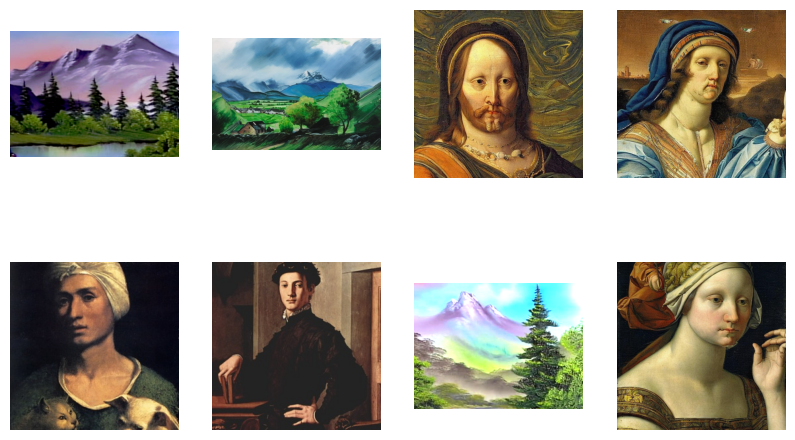

In [ ]:
show_random_images_from("dataset/*/*/*", seed=210)

## Proses Resize Gambar

In [ ]:
for i, img in enumerate(glob("dataset/*/*/*")):
    try:
      image = Image.open(img)
      cover = resizeimage.resize_cover(image, [224, 224])
      cover.save(img)
    except:
      print(img, " ----- error converting, skipped.")

### Gambar Setelah dilakukan Resize

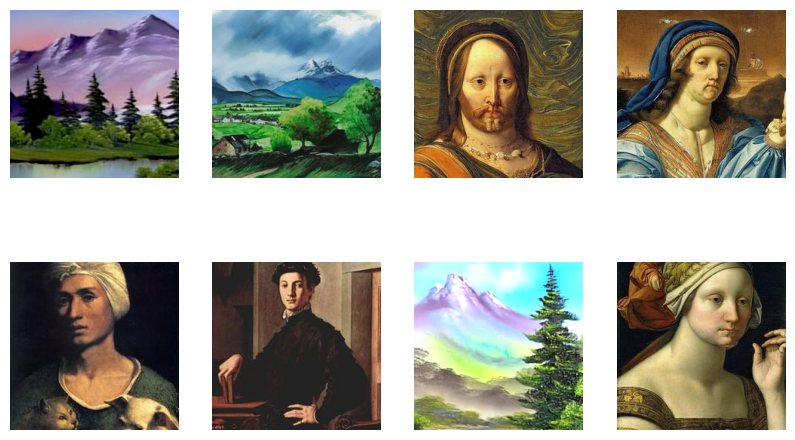

In [ ]:
show_random_images_from("dataset/*/*/*", seed=210)

## Menyimpan Dataset yang sudah bersih ke gdrive

In [ ]:
# Zip dataset folder

!zip -r -q dataset_bersih_v2.zip "/content/dataset/"

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Copy dataset bersih ke gdrive

!cp -r "dataset_bersih_v2.zip" "drive/MyDrive/Tugas Akhir or Skripsian/Dataset/"

In [ ]:
# Cek dataset yang sudah tersimpan

!ls "drive/MyDrive/Tugas Akhir or Skripsian/Dataset/"

dataset_bersih_v2.zip  Portrait_AI_Generated.zip      Portrait_Human_Made.zip
dataset_bersih.zip     portrait_generated_kotor2.zip  portrait_kotor.zip
dataset_test.zip       portrait_generated_kotor.zip
